# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     523.7
Date:                Mon, 13 Oct 2025   Prob (F-statistic):           1.50e-35
Time:                        15:11:25   Log-Likelihood:                -13.503
No. Observations:                  50   AIC:                             35.01
Df Residuals:                      46   BIC:                             42.65
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9227      0.113     43.701      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.42323409  4.87821413  5.29825862  5.65973436  5.94753726  6.15757388
  6.29743396  6.3851435   6.44620307  6.50939819  6.60206991  6.74562281
  6.95200823  7.22176072  7.54391021  7.89778441  8.25640511  8.59092071
  8.87534644  9.09083354  9.22876611  9.29217664  9.29524782  9.26098231
  9.21742354  9.19304817  9.21208754  9.29054644  9.43357367  9.63461601
  9.87649496 10.13422909 10.37913843 10.5835565  10.72537584 10.7916802
 10.78086665 10.70290891 10.57771875 10.43187449 10.29425427 10.19129148
 10.1426318  10.15790547 10.2351451  10.36110886 10.51345613 10.66441793
 10.78535937 10.8514842 ]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.83390789 10.70050872 10.46829258 10.17601366  9.87468614  9.61509411
  9.43535785  9.35160069  9.3540014   9.40919882]


## Plot comparison

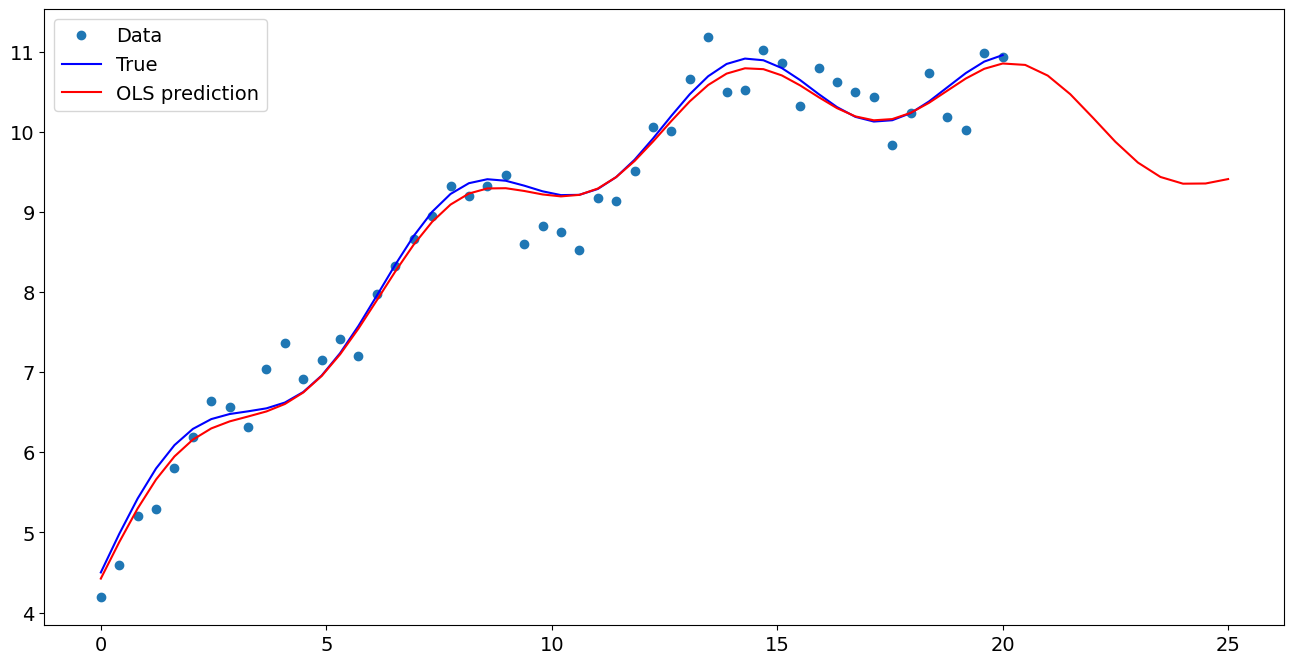

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.922652
x1                  0.501385
np.sin(x1)          0.433644
I((x1 - 5) ** 2)   -0.019977
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.833908
1    10.700509
2    10.468293
3    10.176014
4     9.874686
5     9.615094
6     9.435358
7     9.351601
8     9.354001
9     9.409199
dtype: float64